In [ ]:
%pip install paddlepaddle-gpu -q
%pip install paddleocr -q
%pip install --quiet vietocr
%pip install paddlepaddle -q

In [1]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
from matplotlib.pyplot import figure
# import pandas as pd
# import numpy as np
# from PIL import Image
# import cv2
from paddleocr import PaddleOCR

# import torch

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

from paddleocr import PaddleOCR, draw_ocr


# import difflib
# import re
# import math
# import copy

In [2]:
ocr = PaddleOCR(lang='en')

[2024/04/15 00:34:52] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/hungtrieu07/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/hungtrieu07/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2

In [3]:
# Specifying output path and font path.
out_path = './output'
#font = '/content/drive/MyDrive/Test_Paddle/PaddleOCR/doc/fonts/latin.ttf'
font = './simfang.ttf'

### Paddle + VietOCR

In [4]:
#config = Cfg.load_config_from_name('vgg_seq2seq') # còn vgg_transformer
config = Cfg.load_config_from_name('vgg_transformer') # còn vgg_seq2seq

In [5]:
# config['weights'] = './weights/transformerocr.pth'
config['weights'] = 'https://vocr.vn/data/vietocr/vgg_transformer.pth'
config['cnn']['pretrained']=False

# config['weights'] = 'https://vocr.vn/data/vietocr/vgg_seq2seq.pth'
# # config['pretrain'] = 'https://vocr.vn/data/vietocr/vgg_seq2seq.pth'
# config['cnn']['pretrained']=False

detector = Predictor(config)

Model weight /tmp/vgg_transformer.pth exsits. Ignore download!


In [6]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 4000,
  'iters': 100000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': None},
 'dataset': {'name': 'data',
  'data_root': './img/',
  'train_annotation': 'annotation_train.txt',
  'valid_annotation': 'annotation_val_small.txt',
  'image_height': 32,
  'image_min_width': 32,
  'imag

### Nếu gặp lỗi a.any() or a.all() thì phải sửa code thêm .any() và reset phiên và chạy lại

In [10]:
import importlib.util

from paddleocr import PaddleOCR


def get_module_path(my_module_name):
    spec = importlib.util.find_spec(my_module_name)
    if spec and spec.origin:
        return spec.origin
    return None

def modify_paddleocr_file(my_file_path):
    with open(my_file_path, "r", encoding="utf-8") as file_to_check:
        lines = file_to_check.readlines()
    # Check if the file has enough lines
    if len(lines) > 681:
        # Modify the specified line
        if "if not dt_boxes" in lines[680]:
            print("content of line 674: ", lines[680])
            lines[680] = "                if not dt_boxes.any():\n"
        else:
            print("The content of line 674 doesn't match the expected content.")
            return
    with open(my_file_path, "w", encoding="utf-8") as file_to_modify:
        file_to_modify.writelines(lines)
    print("File modified successfully!")


module_name = "paddleocr"
file_path = get_module_path(module_name).replace("__init__.py", "paddleocr.py")

if file_path:
    print(f"Found at: {file_path}")
    modify_paddleocr_file(file_path)
else:
    print("Module not found!")


PaddleOCR(use_angle_cls=True, lang="en", ocr_version="PP-OCRv4")

Found at: /home/hungtrieu07/miniconda3/envs/OCR_core/lib/python3.8/site-packages/paddleocr/paddleocr.py
content of line 674:                  if not dt_boxes:

File modified successfully!
[2024/04/14 23:37:32] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/hungtrieu07/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/hungtrieu07/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_s

###Pre-processing (edge, rotation, blur)

In [7]:
import cv2
import numpy as np
#check image nét ko
def is_image_sharp(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    variance = laplacian.var()
    return variance > 5000  # Ngưỡng có thể điều chỉnh tùy theo yêu cầu 6000

def sharpen_image(img):
    sharpen_kernel = np.array([[-1, -1, -1],
                               [-1, 9, -1],
                               [-1, -1, -1]])
    return cv2.filter2D(img, -1, sharpen_kernel)

def preprocess_image(img):
    if not is_image_sharp(img):
        print("Ảnh mờ, đang làm sắc nét...")
        img = sharpen_image(img)
    return img

# phát hiện cạnh/bảng của văn bản và mask văn bản
def detect_table_edges(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((3, 3), np.uint8)
    img_dilate = cv2.dilate(thresh, kernel, iterations=1)
    img_erode = cv2.erode(img_dilate, kernel, iterations=1)
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 1))
    detected_lines_horizontal = cv2.morphologyEx(img_erode, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 25))
    detected_lines_vertical = cv2.morphologyEx(img_erode, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
    table_mask = cv2.addWeighted(detected_lines_horizontal, 0.5, detected_lines_vertical, 0.5, 0.0)
    edges_on_white = np.ones_like(img) * 255
    edges_on_white[table_mask == 0] = (255, 255, 255)
    edges_on_white[table_mask != 0] = (0, 0, 0)
    edges_on_white_gray = cv2.cvtColor(edges_on_white, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(edges_on_white_gray, 10, 255, cv2.THRESH_BINARY)
    masked_img = cv2.bitwise_and(img, img, mask=mask)
    return masked_img, edges_on_white

# Tính góc xoay cần điều chỉnh để làm thẳng ảnh
def calculate_rotation_angle(corners):
    if len(corners) < 2:
        return 0
    x1, y1 = corners[0]
    x2, y2 = corners[1]
    angle = np.arctan2(y2 - y1, x2 - x1)
    degrees = np.degrees(angle)
    if degrees < -90:
        # Nếu góc nhỏ hơn -90 độ, xoay về phía bên phải để làm thẳng đứng
        degrees += 180
    elif degrees > 90:
        # Nếu góc lớn hơn 90 độ, xoay về phía bên trái để làm thẳng đứng
        degrees -= 180
    return degrees

# phát hiện góc của bảng để xoay
def detect_table_corners(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 170, apertureSize=3)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

    corners = []
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]

            angle = np.arctan2(y2 - y1, x2 - x1)
            angle_deg = np.degrees(angle)

            if abs(angle_deg) > 45:  # Vertical line
                corners.append((x1, y1))
                corners.append((x2, y2))
            else:  # Horizontal line
                corners.append((x1, y1))
                corners.append((x2, y2))


    rotation_angle = calculate_rotation_angle(corners) # Calculate rotation angle here

    return corners, rotation_angle


### Processing

[2024/04/15 00:35:07] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/hungtrieu07/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/hungtrieu07/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2

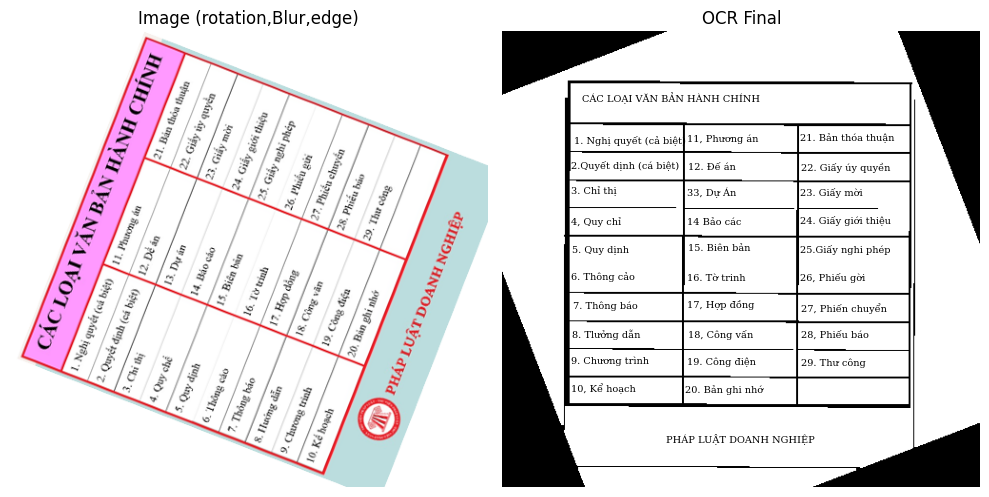

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from paddleocr import PaddleOCR
from PIL import Image

# Khởi tạo PaddleOCR
paddle_ocr = PaddleOCR(use_angle_cls=False, lang="vi", use_gpu=True)

# Đường dẫn đến ảnh
img_path = './assets/nhohon90.png'

img_ori = cv2.imread(img_path)

img = preprocess_image(img_ori)

corners, rotation_angle  = detect_table_corners(img)
# rotation_angle = calculate_rotation_angle(corners)
print("Góc xoay của ảnh là:", rotation_angle, "độ")
# Xoay ảnh
if rotation_angle != 0:
    center = (img.shape[1] // 2, img.shape[0] // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, 1.0)
    img = cv2.warpAffine(img, rotation_matrix, (img.shape[1], img.shape[0]))

# Thực hiện phát hiện vùng quan tâm bằng PaddleOCR
detection_result = paddle_ocr.ocr(img, cls=False, det=True, rec=False)
boxes = [[[[int(line[0][0]), int(line[0][1])], [int(line[2][0]), int(line[2][1])]] for line in detection_result[0]]][0]

# Thay đổi kích thước các bounding box theo yêu cầu của bạn
EXPAND = 5
for box in boxes:
    box[0][0] -= EXPAND
    box[0][1] -= EXPAND
    box[1][0] += EXPAND
    box[1][1] += EXPAND

masked_img, edges_on_white  = detect_table_edges(img) #nhận diện cạnh


texts = []
for box in boxes:
    cropped_image = masked_img[box[0][1]:box[1][1], box[0][0]:box[1][0]]
    cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
    cropped_image = Image.fromarray(cropped_image)
    rec_result = detector.predict(cropped_image)
    texts.append(rec_result)

# Hiển thị ảnh gốc và ảnh chỉ chứa cạnh của bảng trên nền trắng
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB))
axes[0].set_title('Image (rotation,Blur,edge)')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(edges_on_white, cv2.COLOR_BGR2RGB))
axes[1].set_title('OCR Final')
for text, box in zip(texts, boxes):
    x1, y1 = box[0]
    x2, y2 = box[1]
    x1 += 5 # shift right 10 pixel
    x2 += 5 # shift right 10 pixel
    y1 += 10 # shift below
    y2 += 10
    axes[1].text(x1, y1, text, ha='left', va='top', wrap=True, linespacing=0.75, fontdict={'family': 'serif', 'size': 7})

    # # Vẽ bounding box để kiểm tra
    # rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=0.75, edgecolor='r', facecolor='none')
    # axes[1].add_patch(rect)
axes[1].axis('off')

plt.tight_layout()
plt.show()


### Post-processing

### phần crop image, detect của paddle, và nhận diện của vietOCR

In [9]:
def display_image_in_actual_size(im_data, dpi=100):
    #im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

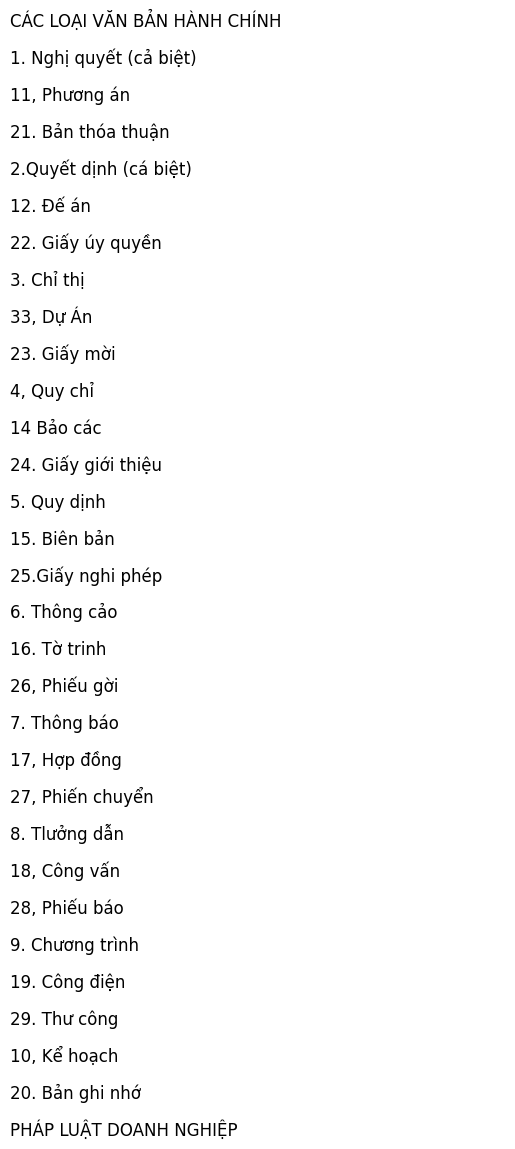

In [10]:
import matplotlib.pyplot as plt
texts_1 = texts #texts[::-1]
# Tạo một hình mới với nền trắng
plt.figure(facecolor='white')
line_spacing = 0.1

# Vòng lặp để hiển thị từng giá trị text
for i, text in enumerate(texts_1):
    # Hiển thị giá trị text tại vị trí (0, i * line_spacing) trên hình
    plt.text(0, i * line_spacing, text, fontsize=12, color='black')


plt.axis('off')
plt.show()
# display_image_in_actual_size(im_show, 100)

### Crop image (after crop image, máy sẽ lấy dữ liệu từ các ảnh đã crop) . Phần này là do thằng paddle detect và cắt ra để phù hợp vs vietOCR

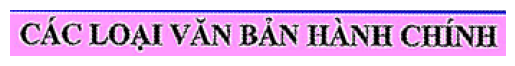

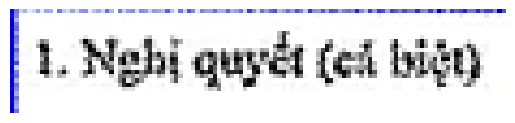

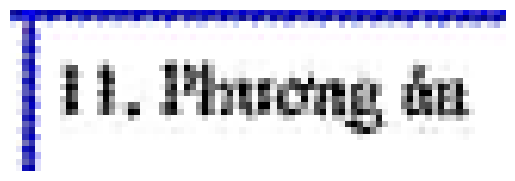

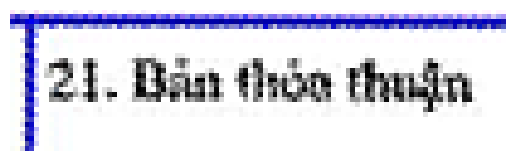

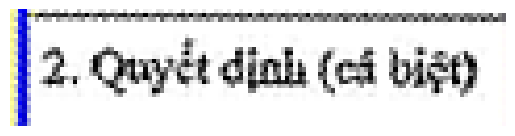

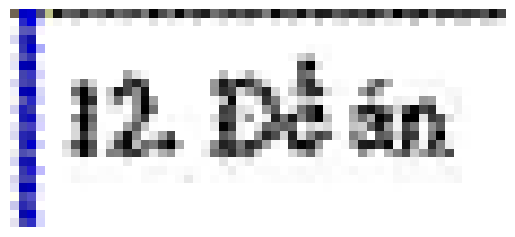

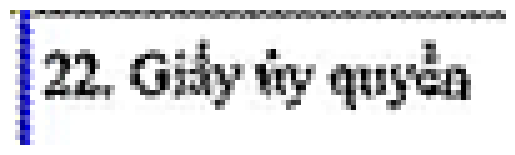

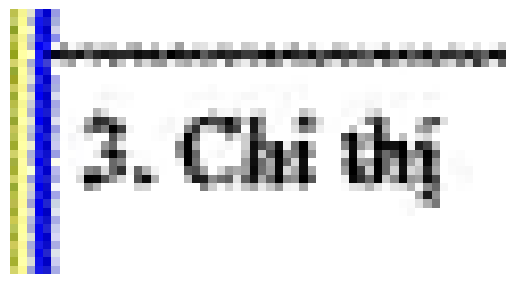

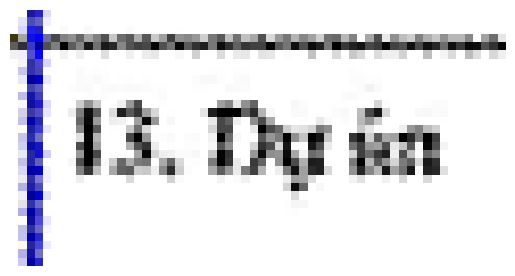

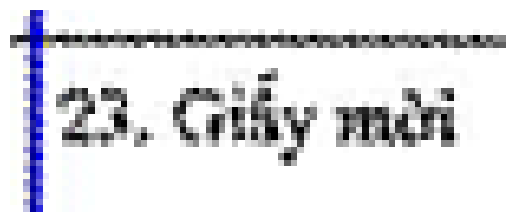

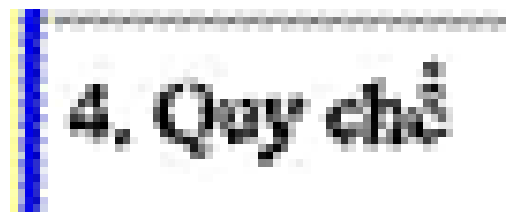

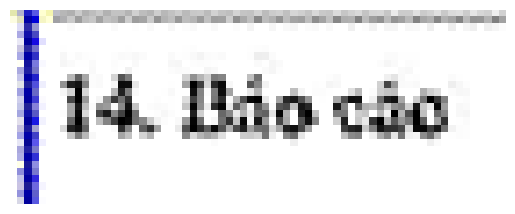

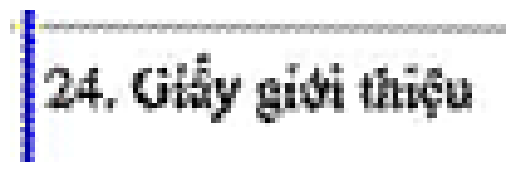

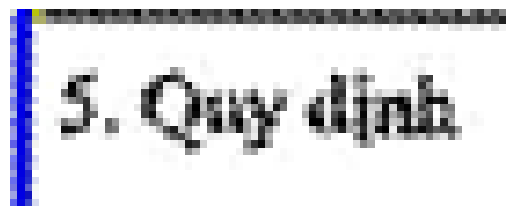

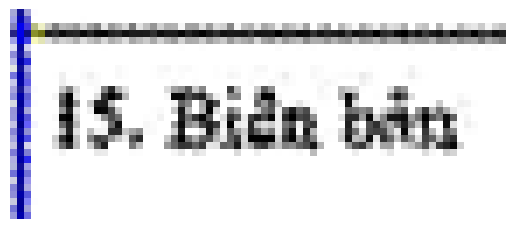

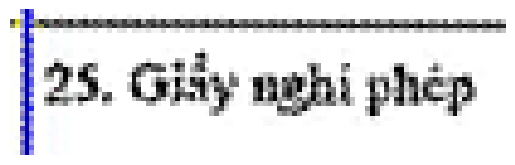

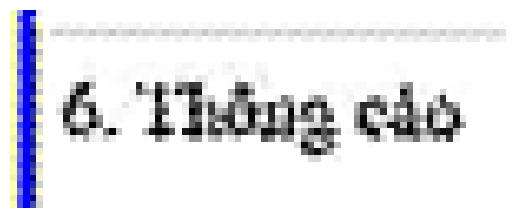

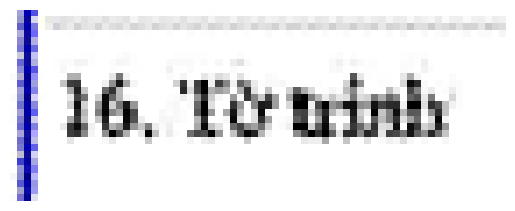

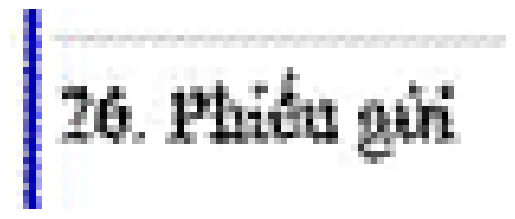

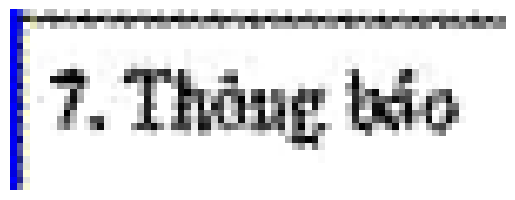

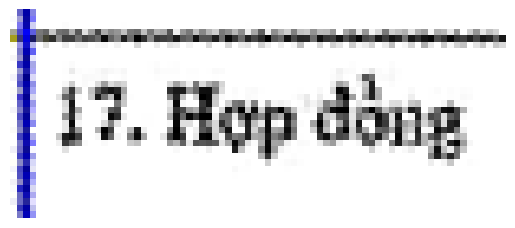

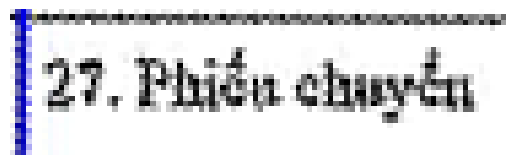

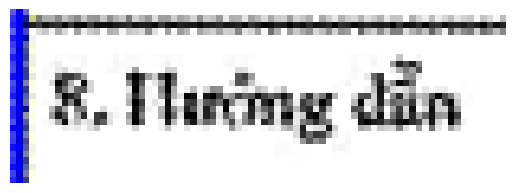

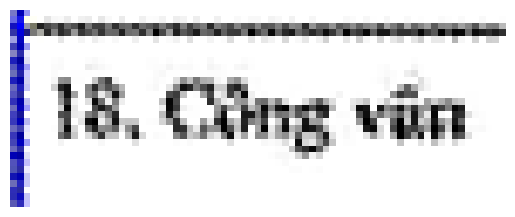

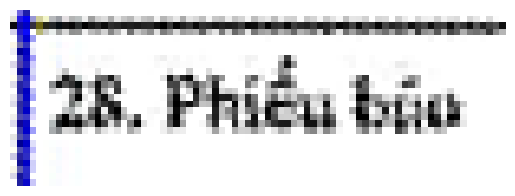

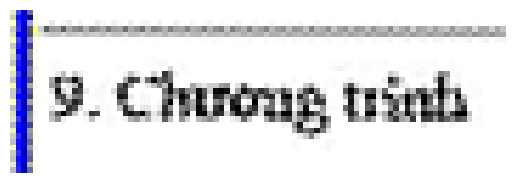

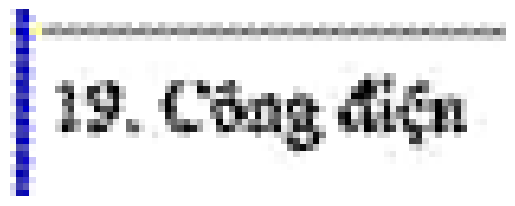

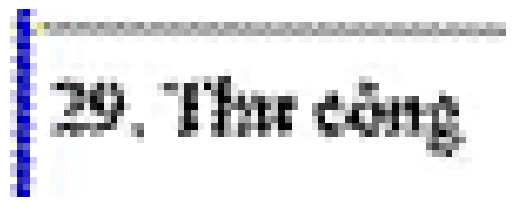

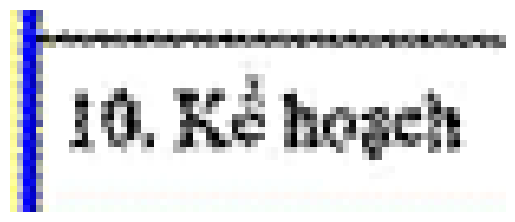

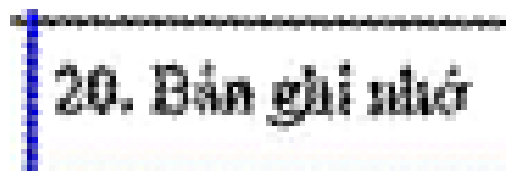

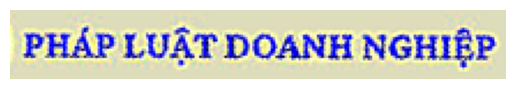

In [11]:
def process(image):
    plt.figure()
    plt.axis('off')
    plt.imshow(image)

count = 0
for box in reversed(boxes):
  cropped_image = img[box[0][1]:box[1][1], box[0][0]:box[1][0]]

  try:
    process(cropped_image)
  except:
    pass
  #count += 1
  # if count == 10:
  #   break

### output là các text đc nhận dạng

In [12]:
output = ""
for text in reversed(texts):
  output += text + " "

output

'CÁC LOẠI VĂN BẢN HÀNH CHÍNH 1. Nghị quyết (cả biệt) 11, Phương án 21. Bản thóa thuận 2.Quyết dịnh (cá biệt) 12. Đế án 22. Giấy úy quyền 3. Chỉ thị 33, Dự Án 23. Giấy mời 4, Quy chỉ 14 Bảo các 24. Giấy giới thiệu 5. Quy dịnh 15. Biên bản 25.Giấy nghi phép 6. Thông cảo 16. Tờ trinh 26, Phiếu gời 7. Thông báo 17, Hợp đồng 27, Phiến chuyển 8. Tlưởng dẫn 18, Công vấn 28, Phiếu báo 9. Chương trình 19. Công điện 29. Thư công 10, Kể hoạch 20. Bản ghi nhớ PHÁP LUẬT DOANH NGHIỆP '